In [60]:
import pandas as pd
import numpy as np
import re
import ast 
from time import process_time
import gensim
from gensim.corpora import Dictionary
from gensim.models.ldamodel import LdaModel
from gensim.models import CoherenceModel
import joblib
import pyLDAvis.gensim
import matplotlib.pyplot as plt

<h3>Preparing Data<h3>

In [62]:
path = "../Technodifacation/Data/training_data_marathi.csv"
data = pd.read_csv(path)
data

,Unnamed: 0,text,label
0,0,"प्रा . प्रताप हरिदास : होय , मला वाटते की हा ए...",com_tech
1,1,"तर , विशिष्ट गोष्टींद्वारे , ठराविक कायद्यांद्...",bioche
2,2,- - - - - - - - - - - - - - - - - - - - - - - ...,cse
3,3,"तर , आपला अर्धा चिन्ह 9 वाजता असेल .",phy
4,4,"म्हणून , मी असे म्हणालो की जर शेकडो , हजारो कि...",phy
...,...,...,...
41992,41992,"जरी आपण डेटा कूटबद्ध केला , तरीही हा मुख्य व्य...",cse
41993,41993,"ते म्हणतात - "" ज्याला पाहण्यासाठी डोळे , ऎकण्य...",com_tech
41994,41994,"प्रथम क्रोनोलॉजिकल , क्रॉनोलॉजी म्हणजे आपल्याल...",com_tech
41995,41995,"त्या थोड्या तपशीलावर येईल , जेणेकरून संपूर्ण ग...",bioche


In [63]:
def clean_text(text):
    #Removing unprintable characters
    text = ''.join(x for x in text if x.isprintable())

    # Cleaning the urls
    text = re.sub(r'https?://\S+|www\.\S+', '', text)

    # Cleaning the html elements
    text = re.sub(r'<.*?>', '', text)

    # Removing the punctuations
    text = re.sub('[!#?,.:";-@#$%^&*_~<>()-]', '', text)
    
    text = [word.lower() for word in text.split()]

    return text

In [64]:
corpus = [clean_text(text) for text in data.text.values.tolist()]
corpus[0]

['प्रा',
 'प्रताप',
 'हरिदास',
 'होय',
 'मला',
 'वाटते',
 'की',
 'हा',
 'एक',
 'महत्त्वाचा',
 'मुद्दा',
 'आहे',
 'की',
 'भारतीय',
 'संदर्भामुळे',
 'आपण',
 'विशेषतः',
 'आमच्या',
 'शैक्षणिक',
 'प्रक्रियेद्वारे',
 'प्रवेश',
 'करू',
 'शकता',
 'जिथे',
 'प्रवेश',
 'परीक्षा',
 'असते',
 'आणि',
 'जी',
 'आपल्याला',
 'विभागांमध्ये',
 'ठेवते',
 'आणि',
 'काही',
 'आपण',
 'त्या',
 'विशिष्ट',
 'क्रियाकलापांवर',
 'अडकले',
 'आहात',
 'असे',
 'कसे',
 'वाटते']

In [ ]:
dict_corpus = Dictionary(corpus)
len('Initial vocab size: ',dict_corpus)

In [ ]:
# Keeping only those words which appear in at most 3 classes and at least 0.3 of the total corupus
dict_corpus.filter_extremes(no_below=5, no_above=0.3, keep_n=None)
len('Reduced Vocab size: ', dict_corpus)

In [67]:
bow_corpus = [dict_corpus.doc2bow(c) for c in corpus]
# bow_corpus[0]

[(0, 1),
 (1, 1),
 (2, 1),
 (3, 1),
 (4, 1),
 (5, 1),
 (6, 1),
 (7, 1),
 (8, 1),
 (9, 1),
 (10, 2),
 (11, 1),
 (12, 1),
 (13, 1),
 (14, 1),
 (15, 1),
 (16, 1),
 (17, 1),
 (18, 1),
 (19, 2),
 (20, 1),
 (21, 1),
 (22, 1),
 (23, 1),
 (24, 1),
 (25, 2),
 (26, 1),
 (27, 1),
 (28, 1),
 (29, 1),
 (30, 1),
 (31, 1),
 (32, 1),
 (33, 1)]

In [70]:
limit=20
start=2
step=2

<h3>LDA implementation<h3>

In [71]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3, coherence='c_v'):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model=LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence=coherence)
        coherence_values.append(coherencemodel.get_coherence())
        print("Done for model with topics ", num_topics)
    return model_list, coherence_values

In [51]:
model_list, coherence_values = compute_coherence_values(dictionary=dict_corpus, 
                                                        corpus=bow_corpus, 
                                                        texts=corpus, 
                                                        start=start, limit=limit, step=step)

Done for model with topics  2
Done for model with topics  4
Done for model with topics  6
Done for model with topics  8
Done for model with topics  10
Done for model with topics  12
Done for model with topics  14
Done for model with topics  16
Done for model with topics  18
Done for model with topics  20
Done for model with topics  22
Done for model with topics  24
Done for model with topics  26
Done for model with topics  28


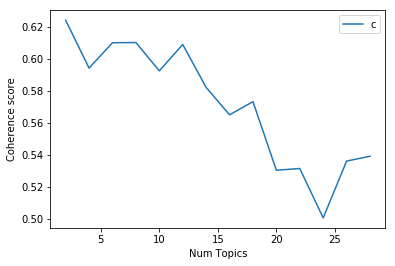

In [55]:
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [56]:
topic = 2
for score in coherence_values:
    print("Topic: {}, coherence: {}".format(topic, score))
    topic+=2

Topic: 2, coherence: 0.624115094988412
Topic: 4, coherence: 0.5942514574746012
Topic: 6, coherence: 0.6100835005104884
Topic: 8, coherence: 0.6101986333392779
Topic: 10, coherence: 0.5925268280425825
Topic: 12, coherence: 0.6089856816670558
Topic: 14, coherence: 0.5821975639283891
Topic: 16, coherence: 0.5650968674840882
Topic: 18, coherence: 0.5733010193261499
Topic: 20, coherence: 0.5305010451055447
Topic: 22, coherence: 0.5315771044674575
Topic: 24, coherence: 0.5007477421502314
Topic: 26, coherence: 0.5362284408683977
Topic: 28, coherence: 0.5392498374461212


In [76]:
print(model_list[0])

LdaModel(num_terms=16440, num_topics=2, decay=0.5, chunksize=2000)


In [58]:
for i in range(len(model_list)):
    path = "../Technodifacation/Embeddings/LDA/Normal/LDA.normal.raw.t" + str(2*i + 2) + ".pkl"
    joblib.dump(model_list[i], path)

In [59]:
lda_visualization = pyLDAvis.gensim.prepare(model_list[2], bow_corpus, dict_corpus, sort_topics=False)
pyLDAvis.display(lda_visualization)

<h3>LDA Mallet Implementation<h3>

In [72]:
import os
os.environ.update({'MALLET_HOME': r'C:/Users/Amey/Desktop/mallet-2.0.8/'})
mallet_path = 'C:/Users/Amey/Desktop/mallet-2.0.8/bin/mallet.bat'  # update this path

def compute_mallet_coherence_values(mallet_path, dictionary, corpus, texts, limit, start=2, step=3, coherence='c_v'):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model= gensim.models.wrappers.LdaMallet(mallet_path=mallet_path, corpus=corpus, id2word=dictionary, num_topics=num_topics)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence=coherence)
        coherence_values.append(coherencemodel.get_coherence())
        print("Done for model with topics ", num_topics)
    return model_list, coherence_values

In [73]:
mallet_model_list, mallet_coherence_values = compute_mallet_coherence_values(mallet_path=mallet_path,
                                                                             dictionary=dict_corpus, 
                                                                             corpus=bow_corpus, 
                                                                             texts=corpus, 
                                                                             start=start, limit=limit, step=step)

Done for model with topics  2
Done for model with topics  4
Done for model with topics  6
Done for model with topics  8
Done for model with topics  10
Done for model with topics  12
Done for model with topics  14
Done for model with topics  16
Done for model with topics  18


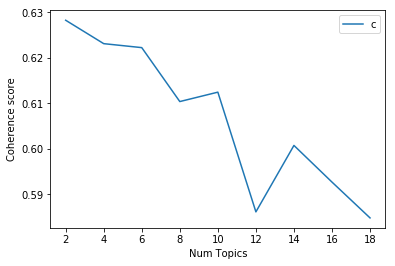

In [74]:
x = range(start, limit, step)
plt.plot(x, mallet_coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [75]:
topic = 2
for score in mallet_coherence_values:
    print("Topic: {}, coherence: {}".format(topic, score))
    topic+=2

Topic: 2, coherence: 0.6282316284640173
Topic: 4, coherence: 0.6230861711130813
Topic: 6, coherence: 0.6222138912590797
Topic: 8, coherence: 0.610359878496187
Topic: 10, coherence: 0.6124264665031693
Topic: 12, coherence: 0.5861157498621095
Topic: 14, coherence: 0.6007162869528405
Topic: 16, coherence: 0.5926606275199349
Topic: 18, coherence: 0.5847867275927401


In [23]:
model_name = "../models/LDA/TechDofication.mr.LDA.mallet.raw.t4.pkl"
joblib.dump(mallet_model_list[3], model_name)

['../models/original_data_topics_8.pk1']

In [42]:
for i in range(len(mallet_model_list)):
    path = "../Technodifacation/Embeddings/LDA/Mallet/LDA.mallet.raw.t" + str(2*i +2) + ".pkl"
    joblib.dump(mallet_model_list[i], path)

In [84]:
mallet_model_list[0].wordtopics.shape

(2, 10833)